# Decison Tree for Diabetes dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes_na.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [3]:
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [4]:
data=data.fillna(method='bfill')
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1


In [6]:
#data.target_names
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
print(x)
print('/'*100)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      148             72           35.0        0  33.6   
1            8.0       85             66           29.0        0  26.6   
2            8.0      183             64            0.0        0  28.1   
3            1.0       89             66           23.0       94  28.1   
4            0.0      137             40           35.0      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0      101             76           48.0      180  32.9   
764          2.0      122             70           27.0        0  36.8   
765          5.0      121             72           23.0      112  26.2   
766          1.0      126             60            0.0        0  30.1   
767          1.0       93             70           31.0        0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  32.0

<Axes: xlabel='Outcome', ylabel='count'>

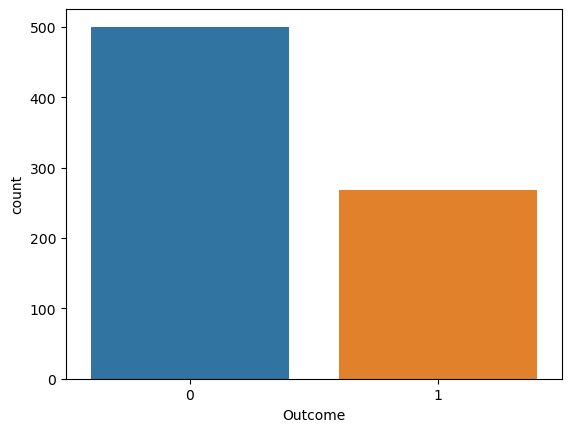

In [7]:
sns.countplot(x=data['Outcome'])

# Split the data for training & testing

In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('**************Training Data shaep***********\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

**************Training Data shaep***********

Training data-X- Shape:	 (576, 8)

Training data-y- Shape:	 (576, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (192, 8)

Testing data(y-Outcome) Shape:	 (192, 1)


# Build the Decision Tree model with criterion =GINI index method

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 

# Build the Decision Tree model with criterion = entropy index method


In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1

# Build the Decision Tree model with max_depth

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={ 'max_depth':[None,3,4,5,6,7,8,10]}
clf=DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)

3


In [12]:
grid_search.best_params_

{'max_depth': 3}

In [13]:
grid_search.cv_results_

{'mean_fit_time': array([0.02389703, 0.0061626 , 0.00732255, 0.00853324, 0.01031938,
        0.00936055, 0.01090941, 0.01117444]),
 'std_fit_time': array([0.00506888, 0.00591082, 0.00429233, 0.0075359 , 0.00468703,
        0.00310695, 0.00157648, 0.00285433]),
 'mean_score_time': array([0.00507016, 0.00502234, 0.00446005, 0.00063105, 0.00349903,
        0.0033968 , 0.0026957 , 0.00278339]),
 'std_score_time': array([0.00181269, 0.00408396, 0.00531083, 0.00126209, 0.00337887,
        0.00275392, 0.00095586, 0.00257396]),
 'param_max_depth': masked_array(data=[None, 3, 4, 5, 6, 7, 8, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 10}],
 'split0_test_score': array([0.63793103, 0.70689655, 0.67241379, 0.65517241, 0.64655172,
        0.655

In [14]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
grid_search.best_index_

1

In [16]:
grid_search.classes_

array([0, 1], dtype=int64)

In [17]:
grid_search.cv

5

In [18]:
grid_search.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [19]:
grid_search.n_splits_

5

In [20]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

[Text(0.468518175074184, 0.9736842105263158, 'X[1] <= 127.5\nentropy = 0.946\nsamples = 576\nvalue = [366, 210]'),
 Text(0.1142433234421365, 0.9210526315789473, 'X[5] <= 26.45\nentropy = 0.708\nsamples = 352\nvalue = [284, 68]'),
 Text(0.03560830860534125, 0.868421052631579, 'X[5] <= 9.1\nentropy = 0.139\nsamples = 102\nvalue = [100, 2]'),
 Text(0.02373887240356083, 0.8157894736842105, 'X[0] <= 7.5\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.011869436201780416, 0.7631578947368421, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.03560830860534125, 0.7631578947368421, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04747774480712166, 0.8157894736842105, 'entropy = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.19287833827893175, 0.868421052631579, 'X[7] <= 28.5\nentropy = 0.833\nsamples = 250\nvalue = [184, 66]'),
 Text(0.0712166172106825, 0.8157894736842105, 'X[5] <= 45.4\nentropy = 0.552\nsamples = 125\nvalue = [109, 16]'),
 Text(0.05934718100890208, 0.7631578

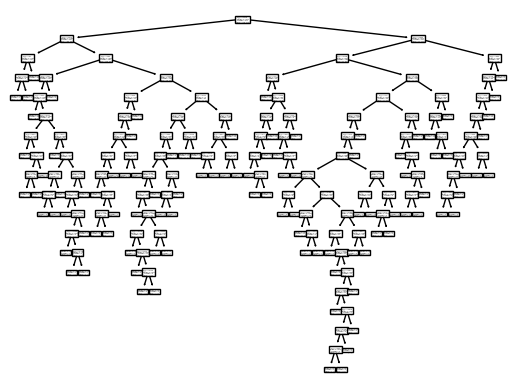

In [21]:
from sklearn import tree
tree.plot_tree(dt_clf)

[Text(0.468518175074184, 0.9736842105263158, 'X[1] <= 127.5\nentropy = 0.946\nsamples = 576\nvalue = [366, 210]'),
 Text(0.1142433234421365, 0.9210526315789473, 'X[5] <= 26.45\nentropy = 0.708\nsamples = 352\nvalue = [284, 68]'),
 Text(0.03560830860534125, 0.868421052631579, 'X[5] <= 9.1\nentropy = 0.139\nsamples = 102\nvalue = [100, 2]'),
 Text(0.02373887240356083, 0.8157894736842105, 'X[0] <= 7.5\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.011869436201780416, 0.7631578947368421, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.03560830860534125, 0.7631578947368421, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04747774480712166, 0.8157894736842105, 'entropy = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.19287833827893175, 0.868421052631579, 'X[7] <= 28.5\nentropy = 0.833\nsamples = 250\nvalue = [184, 66]'),
 Text(0.0712166172106825, 0.8157894736842105, 'X[5] <= 45.4\nentropy = 0.552\nsamples = 125\nvalue = [109, 16]'),
 Text(0.05934718100890208, 0.7631578

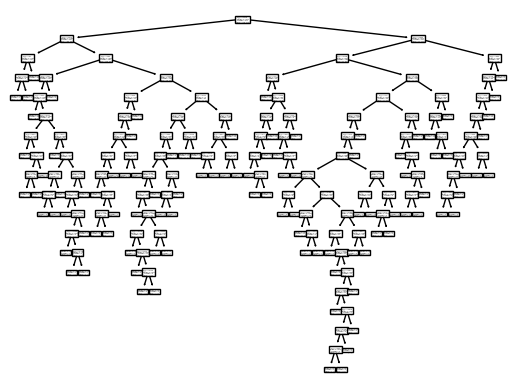

In [22]:
tree.plot_tree(dt_clf)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 

[Text(0.5, 0.8333333333333334, 'X[1] <= 127.5\nentropy = 0.946\nsamples = 576\nvalue = [366, 210]'),
 Text(0.25, 0.5, 'X[5] <= 26.45\nentropy = 0.708\nsamples = 352\nvalue = [284, 68]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.139\nsamples = 102\nvalue = [100, 2]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.833\nsamples = 250\nvalue = [184, 66]'),
 Text(0.75, 0.5, 'X[1] <= 165.5\nentropy = 0.948\nsamples = 224\nvalue = [82, 142]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.997\nsamples = 158\nvalue = [74, 84]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.533\nsamples = 66\nvalue = [8, 58]')]

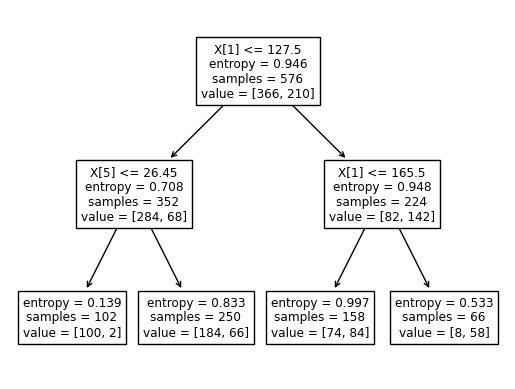

In [24]:
tree.plot_tree(dt_clf)

In [25]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from sklearn import tree
import graphviz

In [27]:
dt_clf.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [28]:
col_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
type(col_names)

list

In [29]:
label_names=['0','1']
label_names

['0', '1']

In [30]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

In [31]:
dot_data=tree.export_graphviz(dt_clf,feature_names=col_names,class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph.render('DT tree')
graph.view()

'DT tree.pdf'